# 0. Loading the data sets using pandas

So we have 2 data sets :

1. The first data set is going to be called "insight_set" and will be used to understand the characteristics of the videos on UGC Youtube. (As mentionned in the readme of the data set).

2. The 2nd data set is going to be called "dataset" and will be used to do the training and machine learning.
    

In [2]:
import pandas as pd

dataset = pd.read_csv("datasets/transcoding_mesurment.tsv",sep='\t')
insight_set = pd.read_csv("datasets/youtube_videos.tsv",sep='\t')


# 1. Data Exploration and Data cleaning : Getting to know our data set.

In [3]:
# Let's see how many rows and columns we have in each dataset

nb_rows_1, nb_col_1 = insight_set.shape
nb_rows_2, nb_col_2 = dataset.shape

print(f"The insight dataset has {nb_rows_1} lines (aka observations) and {nb_col_1} columns (aka features and response)")


The insight dataset has 168286 lines (aka observations) and 11 columns (aka features and response)


In [4]:

print(f"The insight dataset has {nb_rows_2} lines (aka observations) and {nb_col_2} columns (aka features and response)")

The insight dataset has 68784 lines (aka observations) and 22 columns (aka features and response)


In [5]:
# Let's get a sneak peak of the dataset by showing the first 5 rows

insight_set.head(5)

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [6]:
dataset.head(5)

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


We notice that the findings didn't match those stated in the readme file and on the site :

1. The 1st dataset has 11 columns and not 10.

2. The 2nd dataset has 22 columns and not 20 and 168K rows and not 1.6 M rows.

In [7]:
# Let's get the statistical measures on each column

insight_set.describe()

,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.)
count,168286.000000,168286.00000,168286.000000,168286.000000,168286.000000,168286.000000,168286.000000
mean,271.654184,730.62149,624.363025,561.018706,368.399701,24.564592,19.884441
std,552.881871,919.15473,860.955654,359.071569,201.274180,7.396615,11.435070
min,1.000000,0.00000,0.000000,100.000000,88.000000,0.000000,0.000000
25%,55.000000,289.00000,231.000000,320.000000,240.000000,23.980000,12.000000
50%,145.000000,459.00000,349.000000,480.000000,360.000000,29.920000,25.000000
75%,289.000000,826.00000,640.000000,640.000000,480.000000,29.970000,29.970000
max,25845.000000,22421.00000,22229.000000,2592.000000,1944.000000,59.940000,30.020000


In [8]:
dataset.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


We will comment on the insight dataset :

We notice that on average (by average we mean median here) :

1. The videos last 145 seconds
2. With a bitrate of 459 Kb/s with 349 Kb/s used for the video. This corresponds to the data encoding per second for audio and video (bitrate (video) only shows the btirate used for the video encoding, excluding the audio bitrate).
3. The video size is 480 x 360 pixels, meaning a youtube video with a resolution of 360p.
4. Last but not least, The videos run on ~ 30 FPS (frame per second) which is reasonable for this quality. (30-60 FPS is what we want for a fluid video.)

A similar analysis can be done on the actual dataset. However, we can see some extra columns that we will try to explain here :

1. The i, p, b frames are 3 different types of frames in a video :

    1.1 I-Frames are the frames that don't need other frames to decode it, but it is way less compressible than the p and b frames.

    1.2 P-Frames are the frames that can be decoded using its previous frame (which is most likely an I-Frame).  This is more compressible than i-frames.
    
    1.3 B-Frames are the frames that can be decoded using both the previous and following frames. This is the most compressible frame (its previous frame is most likely an I-Frame or a P-Frame and the following is most likely an I-Frame).


2. i_size, p_size, b_size correspond to the size of the afforementionned frames, in bytes.

3. o_bitrate, o_framerate, o_width and o_height are the output values of the measures we explained previously (Their value on Youtube, aka the final video).

4. umem is the allocated memory for the transcoding (unit unknown : either Kb, or more likely Mb)

5. utime is the total transcoding time in seconds. This is the time taken to convert the video to another encoding type (codec).




So our goal is to predict the transcoding time, based on the features we explained (and kept) in the dataset.

### Now let's check if our dataset needs cleaning. We will look if there's any missing values.


In [9]:
dataset.isnull().values.any()

False

Our dataset doesn't have any missing values. If it did, we could remove the rows with missing values or replace its value by the median or mean of the column in question (better).

We notice that some columns will not affect the transcoding time, and will not serve any purpose in our Machine Learning models. These columns are the following and have to be removed :

1. The url of the video. Each video has a unique URL.
2. The Youtube Id of the video. Each video has a unique Youtube Id
3. The estimated frame rate. We will favor using the actual frame rate (since we have it in our dataset) for more accurate results.


As for the category column, we think it will not influence the utime. It will, maybe, influence the duration (for example a music video will be ~ 3-5 minutes but a gaming video can go up to 10 min-1h). So there's no direct relationship between category and utime. But we will do some plots to make sure that our intution is correct.

In [10]:
dataset = dataset.drop(['id'],axis=1) # axis = 1 means that what we want to drop is a column
dataset

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,176,144,22508,0.612
1,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,320,240,25164,0.980
2,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,480,360,29228,1.216
3,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,640,480,34316,1.692
4,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.00,1280,720,58528,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,h264,480,360,278822,29.000000,560,28580,0,29140,...,26561730,0,33886358,flv,242000,24.00,640,480,88692,1.552
68780,129.88100,vp8,640,480,639331,30.162790,36,3855,0,3891,...,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524,18.557
68781,249.68000,vp8,320,240,359345,25.068274,129,6113,0,6242,...,9456514,0,11215178,flv,539000,12.00,176,144,88708,0.752
68782,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,5503,...,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724,5.444


In [11]:
insight_set = insight_set.drop(['id','frame rate(est.)', 'url'], axis=1)
insight_set

,duration,bitrate,bitrate(video),height,width,frame rate,codec,category
0,267,373,274,568,320,29.97,h264,Music
1,267,512,396,480,270,29.97,h264,Music
2,267,324,263,400,226,29.97,flv1,Music
3,267,85,55,176,144,12.00,mpeg4,Music
4,31,1261,1183,640,480,24.00,h264,People & Blogs
...,...,...,...,...,...,...,...,...
168281,68,816,560,480,360,29.97,vp8,Music
168282,68,340,273,320,240,29.97,flv1,Music
168283,68,81,55,176,144,12.00,mpeg4,Music
168284,285,1290,1181,854,480,29.97,h264,Sports


# Finally, let's see what kind of features we are working with

In [12]:
dataset.dtypes

duration       float64
codec           object
width            int64
height           int64
bitrate          int64
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

In [13]:
insight_set.dtypes

duration            int64
bitrate             int64
bitrate(video)      int64
height              int64
width               int64
frame rate        float64
codec              object
category           object
dtype: object

So, we have 2 qualitative features and 18 quantitative features.

Our response / target (aka utime) is quantitative. This means we have a *regression problem*. So we can use algorithms likes linear regression, decision trees  (Random Forest, Bagging, Boosting) etc..


HOWEVER, we see that we need some "feature engineering" for the following columns : category, codec and o_codec. 
They are "object"s but we need them to be factors with few levels / categories.

### Correcting the types of the columns

In [14]:
dataset = dataset.astype({'codec':'category', 'o_codec':'category'})
dataset.dtypes

duration        float64
codec          category
width             int64
height            int64
bitrate           int64
framerate       float64
i                 int64
p                 int64
b                 int64
frames            int64
i_size            int64
p_size            int64
b_size            int64
size              int64
o_codec        category
o_bitrate         int64
o_framerate     float64
o_width           int64
o_height          int64
umem              int64
utime           float64
dtype: object

In [15]:
dataset['codec'] # We have 4 levels / categories for codec

0        mpeg4
1        mpeg4
2        mpeg4
3        mpeg4
4        mpeg4
         ...  
68779     h264
68780      vp8
68781      vp8
68782     h264
68783    mpeg4
Name: codec, Length: 68784, dtype: category
Categories (4, object): [flv, h264, mpeg4, vp8]

In [16]:
insight_set = insight_set.astype({'codec':'category', 'category':'category'})
insight_set.dtypes

duration             int64
bitrate              int64
bitrate(video)       int64
height               int64
width                int64
frame rate         float64
codec             category
category          category
dtype: object

In [17]:
insight_set['category'] # 16 levels for the category column

0                  Music
1                  Music
2                  Music
3                  Music
4         People & Blogs
               ...      
168281             Music
168282             Music
168283             Music
168284            Sports
168285            Sports
Name: category, Length: 168286, dtype: category
Categories (16, object): [Autos & Vehicles, Comedy, Education, Entertainment, ..., Science & Technology, Shows, Sports, Travel & Events]


# 2. Plotting

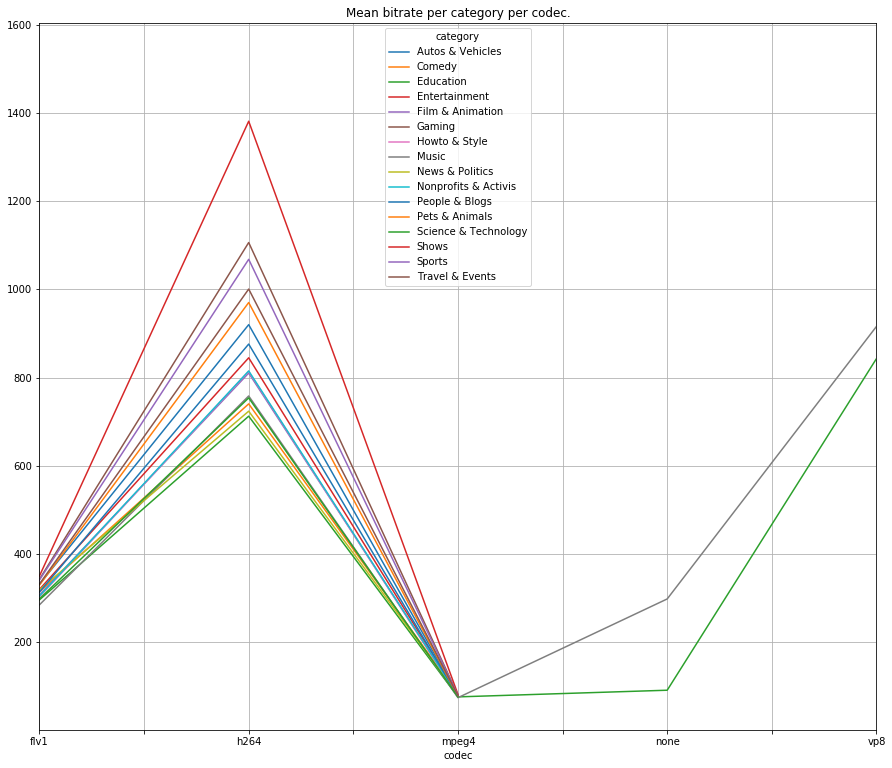

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

category_pivot_table = insight_set.pivot_table('bitrate',index='codec',columns='category')
category_pivot_table.plot(figsize=(15,13),grid=True,title="Mean bitrate per category per codec.")

We can see that on average,  Entertainement / shows / Travel videos tend to have a higher bitrate using h264 while education videos for example have the lowest bitrate.

H264 seems to have the fastest and best bitrate and speed over size ratio.

As we see, the category of the video doesn't really have a direct impact on the utime (or anything) but we can see from this graph that videos from certain categories tend to be longer and larger in size, so it needs higher bitrate or higher encoding time.

In [19]:
# Now let's plot the influence of the number of i frames on the transcoding time.

dataset['i_prop'] = dataset['i'] / dataset['frames']
dataset['p_prop'] = dataset['p'] / dataset['frames']
dataset['b_prop'] = dataset['b'] / dataset['frames']
dataset



,duration,codec,width,height,bitrate,framerate,i,p,b,frames,...,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime,i_prop,p_prop,b_prop
0,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,mpeg4,56000,12.00,176,144,22508,0.612,0.017263,0.982737,0.0
1,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,mpeg4,56000,12.00,320,240,25164,0.980,0.017263,0.982737,0.0
2,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,mpeg4,56000,12.00,480,360,29228,1.216,0.017263,0.982737,0.0
3,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,mpeg4,56000,12.00,640,480,34316,1.692,0.017263,0.982737,0.0
4,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,...,mpeg4,56000,12.00,1280,720,58528,3.456,0.017263,0.982737,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,h264,480,360,278822,29.000000,560,28580,0,29140,...,flv,242000,24.00,640,480,88692,1.552,0.019218,0.980782,0.0
68780,129.88100,vp8,640,480,639331,30.162790,36,3855,0,3891,...,mpeg4,539000,29.97,1920,1080,107524,18.557,0.009252,0.990748,0.0
68781,249.68000,vp8,320,240,359345,25.068274,129,6113,0,6242,...,flv,539000,12.00,176,144,88708,0.752,0.020666,0.979334,0.0
68782,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,5503,...,mpeg4,539000,12.00,320,240,88724,5.444,0.017808,0.982192,0.0


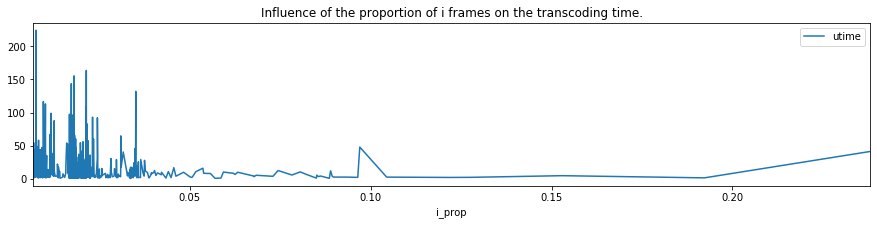

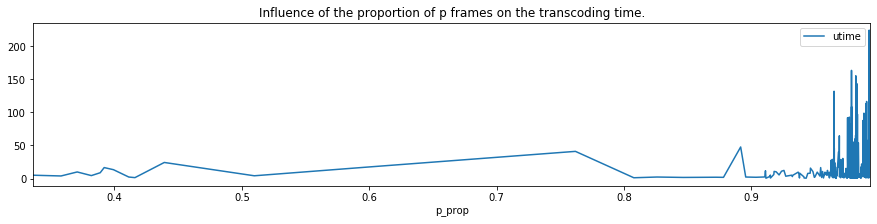

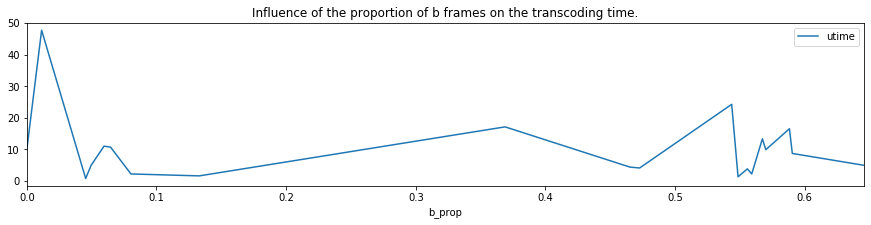

In [20]:
i_pivot_table = dataset.pivot_table('utime',index='i_prop')
p_pivot_table = dataset.pivot_table('utime',index='p_prop')
b_pivot_table = dataset.pivot_table('utime',index='b_prop')

i_pivot_table.plot(figsize=(15,3),grid=False,title="Influence of the proportion of i frames on the transcoding time.")


p_pivot_table.plot(figsize=(15,3),grid=False,title="Influence of the proportion of p frames on the transcoding time.")


b_pivot_table.plot(figsize=(15,3),grid=False,title="Influence of the proportion of b frames on the transcoding time.")

Here we notice the following trend :

1. The more i-frames we have, the lower the transcoding time. This is logical since i-frames don't need other frames to be decoded.
2. The more p-frames we have, the higher the transcoding time. Same, since we need the previous frame to decode it.
3. The more b-frames we have, the faster the transcoding time.

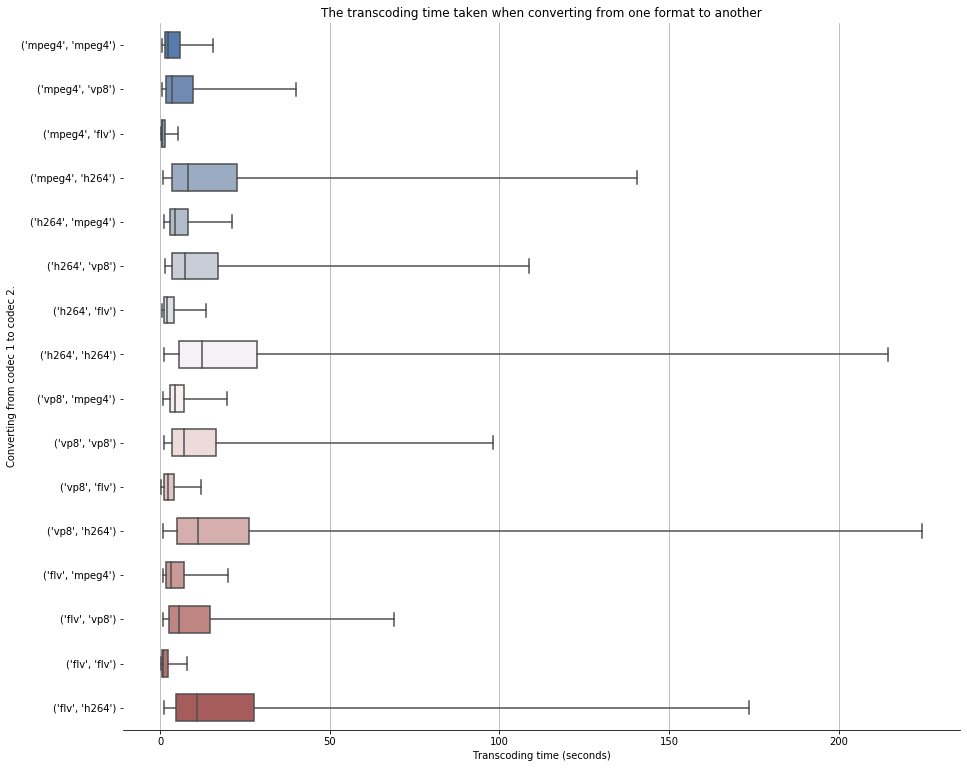

In [21]:
# Let's do a boxplot on the same topic just to make sure that we are correct.
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 13))

dataset['Codec_conversion'] = list(zip(dataset['codec'],dataset['o_codec']))
sns.boxplot(y="Codec_conversion", x="utime", data=dataset, whis=[0, 100], width=.6, palette="vlag")

ax.xaxis.grid(True)
ax.set(ylabel="Converting from codec 1 to codec 2.")
ax.set(xlabel="Transcoding time (seconds)")
ax.set(title="The transcoding time taken when converting from one format to another")
sns.despine(left=True)


We notice, by looking at the median of each box, that the fastest transcoding time is when we are converting to 'flv' format, followed by the 'mpeg4' format not so far behind.

As for the 'h264' format, we see that on average it takes the longest to convert to. But, we can see that its box plot is the largest out of all the other boxes, this means that we have a wide variety of transcoding time for this formet (The interquartile Q3 - Q1 is larger than the rest. So it covers more values.)

The following barplot confirms our conclusion :

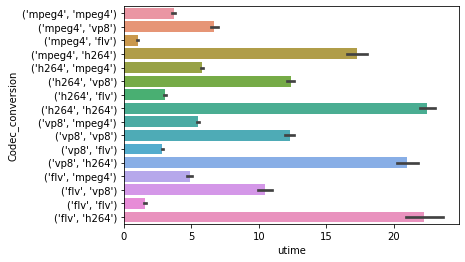

In [22]:
sns.barplot(x="utime",y="Codec_conversion",data=dataset)

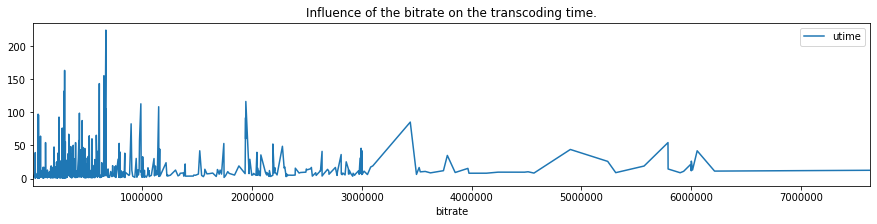

In [24]:
bitrate_pivot_table = dataset.pivot_table('utime',index='bitrate')


bitrate_pivot_table.plot(figsize=(15,3),grid=False,title="Influence of the bitrate on the transcoding time.")

We see that the higher the bitrate, the faster the transcoding time, which makes sense.

However, we see that, sometimes, some codec take less time than others : example, at the far right of the graph, we see that vp8 and h264 took almost the same time even tho vp8 had a much lower bitrate. (However, this could be an exception due to the size / duration of the video.)

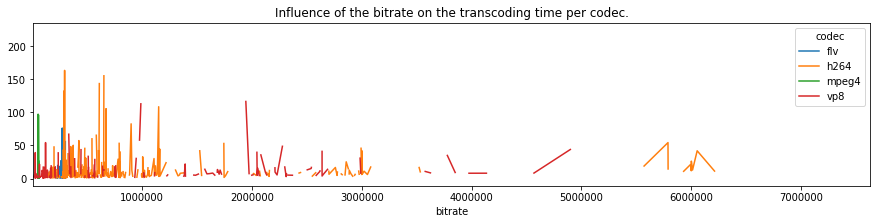

In [25]:
bitrate_pivot_table = dataset.pivot_table('utime',index='bitrate',columns='codec')


bitrate_pivot_table.plot(figsize=(15,3),grid=False,title="Influence of the bitrate on the transcoding time per codec.")

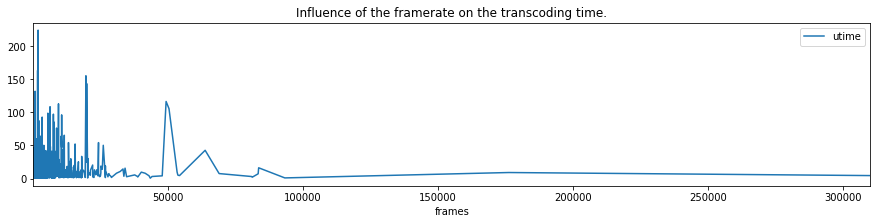

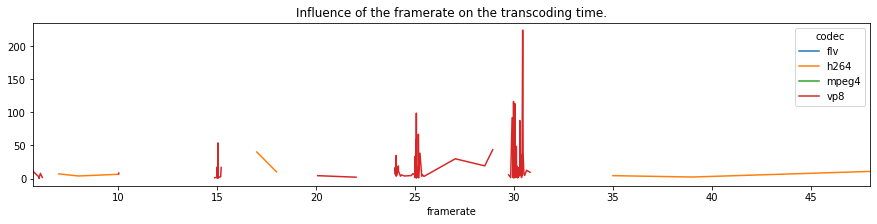

In [26]:
bitrate_pivot_table = dataset.pivot_table('utime',index='frames')
bitrate_pivot_table2 = dataset.pivot_table('utime',index='framerate',columns='codec')

bitrate_pivot_table.plot(figsize=(15,3),grid=False,title="Influence of the framerate on the transcoding time.")
bitrate_pivot_table2.plot(figsize=(15,3),grid=False,title="Influence of the framerate on the transcoding time.")

We notice that most if the videos have a franerate of 25-30 FPS (except some videos using h264 that have > 35 FPS and some using vp8 or h264 having < 20 FPS). So we can't really say that the more frames we have the faster the transcoding time, since it also depends on the framerate of the video too.

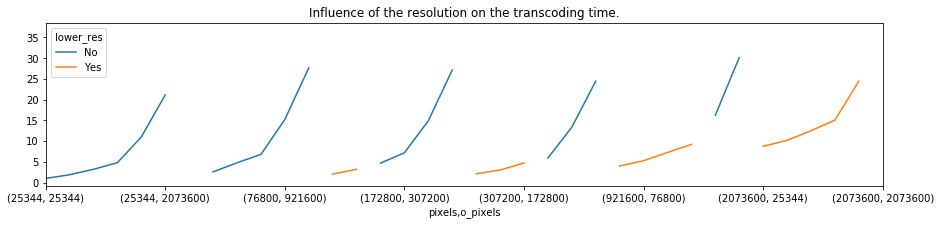

In [39]:
import numpy as np

dataset['pixels'] = dataset['width'] * dataset['height']
dataset['o_pixels'] = dataset['o_width'] * dataset['o_height']
dataset['lower_res'] = np.where(dataset['o_pixels'] < dataset['pixels'], 'Yes','No')

pixel_table = dataset.pivot_table('utime',index=['pixels','o_pixels'],columns = 'lower_res')

pixel_table.plot(figsize=(15,3),grid=False,title="Influence of the resolution on the transcoding time.")


We created a column called pixels which stores the number of pixels in the video. Using this, we plotted the previous graph, and we can understand that, in general, the more pixels we have (meaning the higher the resolution / quality of the video) the slower the transcoding time. 

However, we can see that if we lowered the resolution when transcoding (meaning the number of output pixels is lower than the original number of pixels.), it will take less time to transcode. Meaning, that for the same number of pixels, it will take less time to transcode if we choose a lower resolution when transcoding than if we kept or increased the resolution. 

# 3. Machine Learning

In [35]:
# Let's start with the imports

# Sklearn modules

import itertools
import sklearn.linear_model as mod # import all modells
from sklearn.model_selection import train_test_split, GridSearchCV

# To acess models

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score 


## Let's reload the data to get a fresh start after the exploration

In [28]:
dataset = pd.read_csv("datasets/transcoding_mesurment.tsv",sep='\t')

dataset = dataset.drop(['id'],axis=1) # axis = 1 means that what we want to drop is a column

# The column b_size has very little values so it  will be ~ 0 and scikit learn takes a column having the same value as Nan so we will replace it now with the mean of the column so we can do the machine learning later

dataset = dataset.fillna(dataset.mean()) 


In [29]:
# Splitting the data

X = dataset.loc[:,dataset.columns != 'utime'] # all but the utime column aka the response
y = dataset['utime']

In [30]:
X_train_tempo, X_test_tempo, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=14)

In [31]:
# Let's scale the data since not all columns have the same unit. However, we got some categorial features : the codecs so we have to use one hot encoding

from sklearn.preprocessing import StandardScaler, OneHotEncoder 

scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(sparse=False)

X_train_num  = X_train_tempo
X_train_num = X_train_num.drop(['codec','o_codec'],axis=1)

X_train_cat = X_train_tempo
X_train_cat = X_train_cat[['codec','o_codec']]

scaled_col = scaler.fit_transform(X_train_num)
encoded_col = one_hot_encoder.fit_transform(X_train_cat)

X_train = np.concatenate([scaled_col,encoded_col],axis=1)


X_test_num  = X_test_tempo
X_test_num = X_test_num.drop(['codec','o_codec'],axis=1)

X_test_cat = X_test_tempo
X_test_cat = X_test_cat[['codec','o_codec']]

scaled_col_test = scaler.transform(X_test_num)
encoded_col_test = one_hot_encoder.transform(X_test_cat)

X_test  = np.concatenate([scaled_col_test,encoded_col_test],axis=1)


## Let's put the functions used to do the Grid Search and access the model

In [32]:
def test_hyperparametres(algo, hyperparametres):                                # A generalized function that tests our hyperparams on a given algorithm so we can access the grid search
    grid       = grid_search.GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)

    return grid.best_score_, grid.best_estimator_
    

## Let's test the algorithms we know and acess them

In [32]:
score_dict = {} # This will save the R2 for each model 
mse_dict = {} # This will save the MSE of each model

# Careful, R2 tells us how useful the model is, supposing it is correct. It doesn't say if the model is correct or not

In [34]:
# Linear regression

# MSE To check the error and r2 to check how useful the model is

LR = mod.LinearRegression()


LR.fit(X_train,y_train)

pred_LR = LR.predict(X_test)

print(f"Using Logistic Regression : {round(LR.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_LR),2)}.")

score_dict["Logistic Regression"] = [round(LR.score(X_test,y_test) * 100,2)]
mse_dict["Logistic Regression"]= [round(mean_squared_error(y_test,pred_LR),2)]

cross_val = cross_val_score(LR,X_train,y_train,cv=5)

print(f"\nUsing cross validation, we get the following scores at each fold :\n\n{cross_val}")
 






Using Logistic Regression : 65.86 % of the data is explained (R2) and we have a MSE error of ~> 87.36.

Using cross validation, we get the following scores at each fold :

[0.6579071  0.64846498 0.64844627 0.65084927 0.65150201]


In [35]:
# Decision trees 

from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor(random_state=10) # seeding so we get the same result at each run

Tree.fit(X_train,y_train)

pred_Tree = Tree.predict(X_test)

print(f"Using Trees : {round(Tree.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_Tree),2)}.")

score_dict["Tree"] = [round(Tree.score(X_test,y_test) * 100,2)]
mse_dict["Tree"]= [round(mean_squared_error(y_test,pred_Tree),2)]


cross_val = cross_val_score(Tree,X_train,y_train,cv=5)

print(f"\nUsing cross validation, we get the following scores at each fold :\n\n{cross_val}")


Using Trees : 98.58 % of the data is explained (R2) and we have a MSE error of ~> 3.63.

Using cross validation, we get the following scores at each fold :

[0.96816029 0.97640913 0.97941243 0.97197753 0.96927562]


~> Careful, high accuracy could mean we overfit the data ! We could find the optimal pruning.

In [36]:
# Bagging

from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor

Bag = BaggingRegressor(random_state=10)
Bag.fit(X_train,y_train)

pred_Bag = Bag.predict(X_test)

print(f"Using Bagging : {round(Bag.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_Bag),2)}.")

score_dict["Bagging"] = [round(Bag.score(X_test,y_test) * 100,2)]
mse_dict["Bagging"] = [round(mean_squared_error(y_test,pred_Bag),2)]

cross_val = cross_val_score(Bag,X_train,y_train,cv=5)

print(f"\nUsing cross validation, we get the following scores at each fold :\n\n{cross_val}")



Using Bagging : 98.92 % of the data is explained (R2) and we have a MSE error of ~> 2.75.

Using cross validation, we get the following scores at each fold :

[0.98046911 0.97915429 0.98342986 0.98203454 0.98463497]


~> Careful, this could be overfitting the data ! (High score)

In [37]:
# Random Forest 

RF = RandomForestRegressor(random_state=14)
RF.fit(X_train,y_train)

pred_RF = RF.predict(X_test)

print(f"Using Random Forest : {round(RF.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_RF),2)}.")

score_dict["Random Forest"] = round(RF.score(X_test,y_test) * 100,2)
mse_dict["Random Forest"]= round(mean_squared_error(y_test,pred_RF),2)

cross_val = cross_val_score(RF,X_train,y_train,cv=5)

print(f"\nUsing cross validation, we get the following scores at each fold :\n\n{cross_val}")

Using Random Forest : 98.99 % of the data is explained (R2) and we have a MSE error of ~> 2.59.

Using cross validation, we get the following scores at each fold :

[0.9862611  0.98285495 0.98439427 0.98339799 0.98369596]


In [38]:
# Boosting

Boost = GradientBoostingRegressor(random_state=20)
Boost.fit(X_train,y_train)

pred_Boost = Boost.predict(X_test)

print(f"Using Boosting : {round(Boost.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_Boost),2)}.")

score_dict["Boosting"] = [round(Boost.score(X_test,y_test) * 100,2)]
mse_dict["Boosting"]= [round(mean_squared_error(y_test,pred_Boost),2)]

cross_val = cross_val_score(Boost,X_train,y_train,cv=5)

print(f"\nUsing cross validation, we get the following scores at each fold :\n\n{cross_val}")

Using Boosting : 93.28 % of the data is explained (R2) and we have a MSE error of ~> 17.19.

Using cross validation, we get the following scores at each fold :

[0.93247623 0.92575145 0.93844706 0.9320736  0.93067548]


In [39]:
# let's try boosting with learning rate of 0.001

Boost2 = GradientBoostingRegressor(random_state=20,learning_rate=0.001)
Boost2.fit(X_train,y_train)

pred_Boost2 = Boost2.predict(X_test)

print(f"Using Boosting with 0.001 learning rate : {round(Boost2.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_Boost2),2)}.")

score_dict["Boosting 0.001"] = [round(Boost2.score(X_test,y_test) * 100,2)]
mse_dict["Boosting 0.001"]= [round(mean_squared_error(y_test,pred_Boost2),2)]

cross_val = cross_val_score(Boost2,X_train,y_train,cv=5)

print(f"\nUsing cross validation, we get the following scores at each fold :\n\n{cross_val}")

Using Boosting with 0.001 learning rate : 13.58 % of the data is explained (R2) and we have a MSE error of ~> 221.16.

Using cross validation, we get the following scores at each fold :

[0.14167225 0.13815918 0.13510576 0.13513162 0.13849146]


~> We see that it is way too inaccurate with this learning rate. so we prefer high learning rate with low number of trees

In [40]:
# KNN 

from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)

pred_KNN = KNN.predict(X_test)

print(f"Using KNN : {round(KNN.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_KNN),2)}.")


score_dict["KNN"] = [round(KNN.score(X_test,y_test) * 100,2)]
mse_dict["KNN"]= [round(mean_squared_error(y_test,pred_KNN),2)]

cross_val = cross_val_score(KNN,X_train,y_train,cv=5)

print(f"\nUsing cross validation, we get the following scores at each fold :\n\n{cross_val}")


Using KNN : 93.62 % of the data is explained (R2) and we have a MSE error of ~> 16.33.

Using cross validation, we get the following scores at each fold :

[0.91863823 0.92265796 0.93006439 0.92658839 0.92622835]


In [41]:
# SVR linear kernel

from sklearn.svm import SVR

SVR_lin = SVR('linear')
SVR_lin.fit(X_train,y_train)

pred_SVR_lin = SVR_lin.predict(X_test)

print(f"Using SVR with linear kernel : {round(SVR_lin.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_SVR_lin),2)}.")


score_dict["SVR linear"] = [round(SVR_lin.score(X_test,y_test) * 100,2)]
mse_dict["SVR linear"]= [round(mean_squared_error(y_test,pred_SVR_lin),2)]


# We won't compute the cross validation score since it takes a long time to train each time

Using SVR with linear kernel : 53.55 % of the data is explained (R2) and we have a MSE error of ~> 118.87.


In [42]:
# SVR rbf kernel

from sklearn.svm import SVR

SVR_rbf = SVR()
SVR_rbf.fit(X_train,y_train)

pred_SVR = SVR_rbf.predict(X_test)

print(f"Using SVR with rbf kernel : {round(SVR_rbf.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred_SVR),2)}.")


score_dict["SVR rbf"] = [round(SVR_rbf.score(X_test,y_test) * 100,2)]
mse_dict["SVR rbf"]= [round(mean_squared_error(y_test,pred_SVR),2)]

# We won't compute the cross validation score since it takes a long time to train each time

Using SVR with rbf kernel : 82.41 % of the data is explained (R2) and we have a MSE error of ~> 45.02.


## Let's plot the performance and choose the best ones

In [43]:
performances = pd.DataFrame.from_dict(score_dict).T
MSE = pd.DataFrame.from_dict(mse_dict).T

dataframe_no_grid_search = pd.concat([performances,MSE],axis = 1)
dataframe_no_grid_search.columns = ["R2","MSE"]
dataframe_no_grid_search = dataframe_no_grid_search.sort_values(by='R2',ascending=False)

dataframe_no_grid_search

,R2,MSE
Random Forest,98.99,2.59
Bagging,98.92,2.75
Tree,98.58,3.63
KNN,93.62,16.33
Boosting,93.28,17.19
SVR rbf,82.41,45.02
Logistic Regression,65.86,87.36
SVR linear,53.55,118.87
Boosting 0.001,13.58,221.16


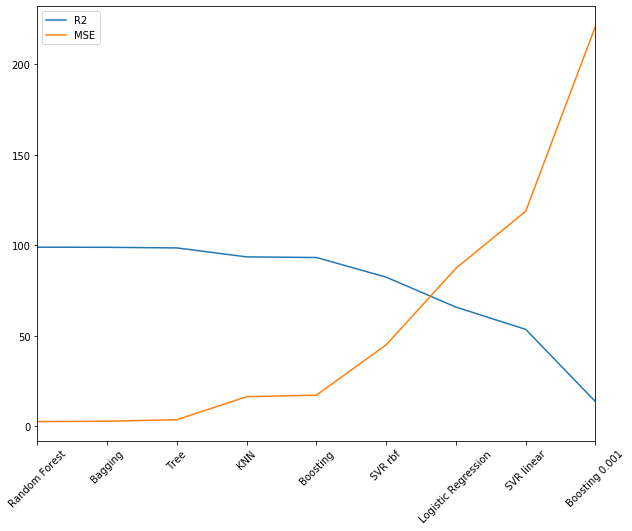

In [44]:
dataframe_no_grid_search.plot(rot=45,figsize=(10,8))

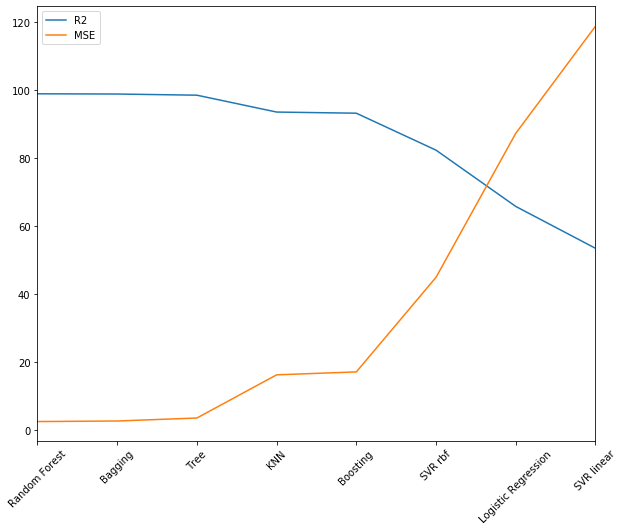

In [45]:
# We can see that boosting with 0.001 learning rate was very inaccurate, hence why we will drop it so we can have a readable graph

dataframe_no_grid_search = dataframe_no_grid_search.drop(['Boosting 0.001'])
dataframe_no_grid_search.plot(rot=45,figsize=(10,8))

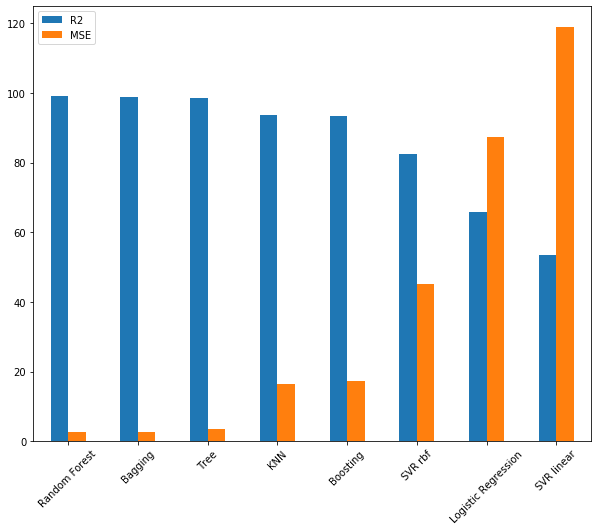

In [46]:
dataframe_no_grid_search.plot(rot=45,kind='bar',figsize=(10,8))


# 4. Grid Search

So here, we see that Decision trees performed really well alongside KNN. So for our grid search, we will take all the models except logistic regression, SVR and boosting with 0.001 learning rate.

We can get the function seen in the course where we test all regression algorithms and see which one is the best then tweak it. However, since we already have 98-99% R2, we prefer keeping the models we know (from Machine Learning module and from the course of this module) and try to tweak them.

In [51]:
score_dict_opti = {}
score_dict_opti_train = {} # it will store the grid best score
mse_dict_opti = {}

### Boosting


In [83]:
# Iter 1

algo = GradientBoostingRegressor(random_state=20)

params = {"learning_rate" : [0.09,0.01,0.02],
         "n_estimators" : [50,100,150],
         "min_samples_split": [2,5,10], # to stop it from memorizing the answers so reducing overfitting
         #"min_samples_leaf": [2,5,10],
         "criterion":['friedman_mse','mse']}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Boosting"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Boosting"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Boosting"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9384606485616009 using these hyperparameters :
 GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.09, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=20, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

~> 94.16 % of the data is explained (R2) and we have a MSE error of ~> 14.95.


In [84]:
# Iter 2

algo = GradientBoostingRegressor(random_state=20)

params = {"learning_rate" : [0.09,0.925,0.95],
         "n_estimators" : [150],
         "min_samples_split": [10,15,20], # to stop it from memorizing the answers so reducing overfitting
         #"min_samples_leaf": [2,5,10],
         "criterion":['mse']}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Boosting"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Boosting"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Boosting"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9615633919679321 using these hyperparameters :
 GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.925, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=20,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=20, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

~> 96.52 % of the data is explained (R2) and we have a MSE error of ~> 8.91.


In [85]:
# Iter 3

algo = GradientBoostingRegressor(random_state=20)

params = {"learning_rate" : [0.09,0.925,0.95],
         "n_estimators" : [150],
         "min_samples_split": [20,25,30], # to stop it from memorizing the answers so reducing overfitting
         "min_samples_leaf": [2,5,10],
         "criterion":['mse']}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Boosting"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Boosting"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Boosting"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9666301961970852 using these hyperparameters :
 GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.925, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=20, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

~> 96.86 % of the data is explained (R2) and we have a MSE error of ~> 8.04.


In [86]:
# Iter 4

algo = GradientBoostingRegressor(random_state=20)

params = {"learning_rate" : [0.09,0.925,0.95],
         "n_estimators" : [150],
         "min_samples_split": [22,25,27], # to stop it from memorizing the answers so reducing overfitting
         "min_samples_leaf": [10,20,30],
         "criterion":['mse']}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")

score_dict_opti["Boosting"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Boosting"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Boosting"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9670600272199944 using these hyperparameters :
 GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.95, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=27,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=20, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

~> 96.99 % of the data is explained (R2) and we have a MSE error of ~> 7.7.


In [87]:
# Iter 5

algo = GradientBoostingRegressor(random_state=20)

params = {"learning_rate" : [0.09,0.925,0.95],
         "n_estimators" : [150],
         "min_samples_split": [27], # to stop it from memorizing the answers so reducing overfitting
         "min_samples_leaf": [7,10,13],
         "criterion":['mse']}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")

score_dict_opti["Boosting"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Boosting"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Boosting"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9670600272199944 using these hyperparameters :
 GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.95, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=27,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=20, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

~> 96.99 % of the data is explained (R2) and we have a MSE error of ~> 7.7.


### KNN

In [88]:
# Iter 1

algo = KNeighborsRegressor()

params = {"n_neighbors" : [1,3,5,7,10],
         "weights" : ['uniform','distance'],
         "p":[1,2]} # Manhattan and Euclidean distances
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["KNN"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["KNN"] = [round(grid.best_score_*100,2)]
mse_dict_opti["KNN"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9551604083470947 using these hyperparameters :
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='distance')

~> 97.41 % of the data is explained (R2) and we have a MSE error of ~> 6.64.


In [89]:
# Iter 2

algo = KNeighborsRegressor()

params = {"n_neighbors" : [1,2,3,4],
         "weights" : ['distance'],
         "p":[1]}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["KNN"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["KNN"] = [round(grid.best_score_*100,2)]
mse_dict_opti["KNN"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9551604083470947 using these hyperparameters :
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='distance')

~> 97.41 % of the data is explained (R2) and we have a MSE error of ~> 6.64.


### Trees

In [52]:
# Iter 1

algo = DecisionTreeRegressor(random_state=10)

params = {"criterion" : ['mse','friedman_mse'],
         "splitter" : ['best','random'],
         "min_samples_split": [2,5,10], # to stop it from memorizing the answers so reducing overfitting
         "min_samples_leaf": [2,5,10],
         "max_features":["auto","sqrt","log2",None]}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}")  

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Tree"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Tree"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Tree"]= [round(mean_squared_error(y_test,pred),2)]


We get the following score : 0.965369454502901 using these hyperparameters :
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

~> 98.41 % of the data is explained (R2) and we have a MSE error of ~> 4.07.


In [56]:
# Iter 2

algo = DecisionTreeRegressor(random_state=10)

params = {"criterion" : ['mse'],
         "splitter" : ['best'],
         "min_samples_split": [0.7,0.8,0.9], # to stop it from memorizing the answers so reducing overfitting
         "min_samples_leaf": [0.2,0.3,0.4],
         "max_features":["auto"]}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}")  

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Tree"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Tree"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Tree"]= [round(mean_squared_error(y_test,pred),2)]


We get the following score : 0.22386854249203628 using these hyperparameters :
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.2,
                      min_samples_split=0.7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

~> 22.02 % of the data is explained (R2) and we have a MSE error of ~> 199.56.


In [61]:
# Iter 3

algo = DecisionTreeRegressor(random_state=10)

params = {"criterion" : ['mse'],
         "splitter" : ['best'],
         "min_samples_split": [2,5,10], # to stop it from memorizing the answers so reducing overfitting
         "min_samples_leaf": [2,5,10],
         "max_features":["auto"],
         "presort":[True,False],
         "max_depth":[None,1,5,10,20]}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}")  

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Tree"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Tree"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Tree"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9654933922940697 using these hyperparameters :
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=10, splitter='best')

~> 98.37 % of the data is explained (R2) and we have a MSE error of ~> 4.18.


In [62]:
# Iter 4

algo = DecisionTreeRegressor(random_state=10)

params = {"criterion" : ['mse'],
         "splitter" : ['best'],
         "min_samples_split": [3,5,7], # to stop it from memorizing the answers so reducing overfitting
         "min_samples_leaf": [2,3,4],
         "max_features":["auto"],
         "presort":[True],
         "max_depth":[None,50,100,500]}
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}")  

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Tree"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Tree"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Tree"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9654933922940697 using these hyperparameters :
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=10, splitter='best')

~> 98.37 % of the data is explained (R2) and we have a MSE error of ~> 4.18.


In [65]:
# Iter 5

algo = DecisionTreeRegressor(random_state=10)

params = {"criterion" : ['mse'],
         "splitter" : ['best'],
         "min_samples_split": [5], # to stop it from memorizing the answers so reducing overfitting
         "min_samples_leaf": [2],
         "max_features":["auto"],
         "presort":[True],
         "max_depth":[None]}
        
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}")  

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Tree"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Tree"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Tree"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9654933922940697 using these hyperparameters :
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=10, splitter='best')

~> 98.37 % of the data is explained (R2) and we have a MSE error of ~> 4.18.


### Bagging

In [70]:
# Iter 1

algo = BaggingRegressor(random_state=10)

params = {"n_estimators" : [10,50,100,150],
         "oob_score" : [True,False],  # True if we want to test our model on unseen data
         "max_samples":[0.5,0.7,1.0],
         "max_features":[0.5,0.7,1.0],
         #"warm_start":[True,False], # all three are available only if oob_score is False
         #"bootstrap":[True,False], 
         #"bootstrap_features":[True,False]
         }
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Bagging"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Bagging"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Bagging"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9828664717954971 using these hyperparameters :
 BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=150,
                 n_jobs=None, oob_score=True, random_state=10, verbose=0,
                 warm_start=False)

~> 99.1 % of the data is explained (R2) and we have a MSE error of ~> 2.31.


In [72]:
# Iter 2

algo = BaggingRegressor(random_state=10)

params = {"n_estimators" : [125,150,175],
         "oob_score" : [True],
         "max_samples":[0.9,0.95,0.99,1.0],
         "max_features":[0.9,0.95,0.99,1.0],
         #"warm_start":[True,False], # all three are available only if oob_score is False
         #"bootstrap":[True,False], 
         #"bootstrap_features":[True,False]
         }
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Bagging"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Bagging"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Bagging"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9841656768776839 using these hyperparameters :
 BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=0.95, max_samples=1.0, n_estimators=175,
                 n_jobs=None, oob_score=True, random_state=10, verbose=0,
                 warm_start=False)

~> 99.09 % of the data is explained (R2) and we have a MSE error of ~> 2.33.


In [74]:
# Iter 3

algo = BaggingRegressor(random_state=10)

params = {"n_estimators" : [175], # We keep 150 since with 175 we get a better score but slightly worse R2 and higher MSE ~> overfitting
         "oob_score" : [True],
         "max_samples":[1.0],
         "max_features":[0.925,0.95,0.975],
         #"warm_start":[True,False], # all three are available only if oob_score is False
         #"bootstrap":[True,False], 
         #"bootstrap_features":[True,False]
         }
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Bagging"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Bagging"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Bagging"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9841656768776839 using these hyperparameters :
 BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=0.925, max_samples=1.0, n_estimators=175,
                 n_jobs=None, oob_score=True, random_state=10, verbose=0,
                 warm_start=False)

~> 99.09 % of the data is explained (R2) and we have a MSE error of ~> 2.33.


### RF

In [78]:
# Iter 1

algo = RandomForestRegressor(random_state=14)

params = {"n_estimators" : [10,50,100,150],
         #"max_depth" : [None,10,5],
         "min_samples_split":[2,3,5],
         "min_samples_leaf": [1,3,5],
         #"ccp_alpha":[0.0,0.5,1.0], important but not available in current version of sklearn
         "oob_score":[True,False] # To acess the model on unseen data and remove bias / overfitting
         }
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Random Forest"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Random Forest"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Random Forest"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9830461819714025 using these hyperparameters :
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=True, random_state=14, verbose=0,
                      warm_start=False)

~> 99.11 % of the data is explained (R2) and we have a MSE error of ~> 2.27.


In [79]:
# Iter 2

algo = RandomForestRegressor(random_state=14)

params = {"n_estimators" : [150],
         "max_depth" : [None,5,10],
         "min_samples_split":[2],
         "min_samples_leaf": [1],
         #"ccp_alpha":[0.0,0.5,1.0], important but not available in current version of sklearn
         "oob_score":[True] # To acess the model on unseen data and remove bias / overfitting
         }
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Random Forest"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Random Forest"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Random Forest"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9830461819714025 using these hyperparameters :
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=True, random_state=14, verbose=0,
                      warm_start=False)

~> 99.11 % of the data is explained (R2) and we have a MSE error of ~> 2.27.


In [82]:
# Iter 3

algo = RandomForestRegressor(random_state=14)

params = {"n_estimators" : [150],
         "max_depth" : [None,50,100],
         "min_samples_split":[2],
         "min_samples_leaf": [1],
         #"ccp_alpha":[0.0,0.5,1.0], important but not available in current version of sklearn
         "oob_score":[True] # To acess the model on unseen data and remove bias / overfitting
         }
         
grid = GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)

print (f"We get the following score : {grid.best_score_} using these hyperparameters :\n {grid.best_estimator_}") 

# R2 and MSE

pred = grid.best_estimator_.predict(X_test)

print(f"\n~> {round(grid.best_estimator_.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")


score_dict_opti["Random Forest"] = [round(grid.best_estimator_.score(X_test,y_test) * 100,2)]
score_dict_opti_train["Random Forest"] = [round(grid.best_score_*100,2)]
mse_dict_opti["Random Forest"]= [round(mean_squared_error(y_test,pred),2)]

We get the following score : 0.9830461819714025 using these hyperparameters :
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=True, random_state=14, verbose=0,
                      warm_start=False)

~> 99.11 % of the data is explained (R2) and we have a MSE error of ~> 2.27.


# 5. Choosing the best model

In [93]:
performances_opti = pd.DataFrame.from_dict(score_dict_opti).T
MSE_opti = pd.DataFrame.from_dict(mse_dict_opti).T

score_opti = pd.DataFrame.from_dict(score_dict_opti_train).T
score_opti.columns = ["Grid best score"]
score_opti = score_opti.sort_values(by='Grid best score',ascending=False)

compare_R2 = pd.concat([performances.drop(['Boosting 0.001','Logistic Regression','SVR linear','SVR rbf']),performances_opti],axis = 1)
compare_R2.columns = ["R2","R2 after Grid Search"]
compare_R2 = compare_R2.sort_values(by='R2 after Grid Search',ascending=False)


compare_MSE = pd.concat([MSE.drop(['Boosting 0.001','Logistic Regression','SVR linear','SVR rbf']),MSE_opti],axis = 1)
compare_MSE.columns = ["MSE","MSE after Grid Search"]
compare_MSE = compare_MSE.sort_values(by='MSE after Grid Search',ascending=True)

final_dataframe = pd.concat([compare_R2,compare_MSE],axis=1)
final_dataframe = final_dataframe.sort_values(by='R2 after Grid Search',ascending=False)


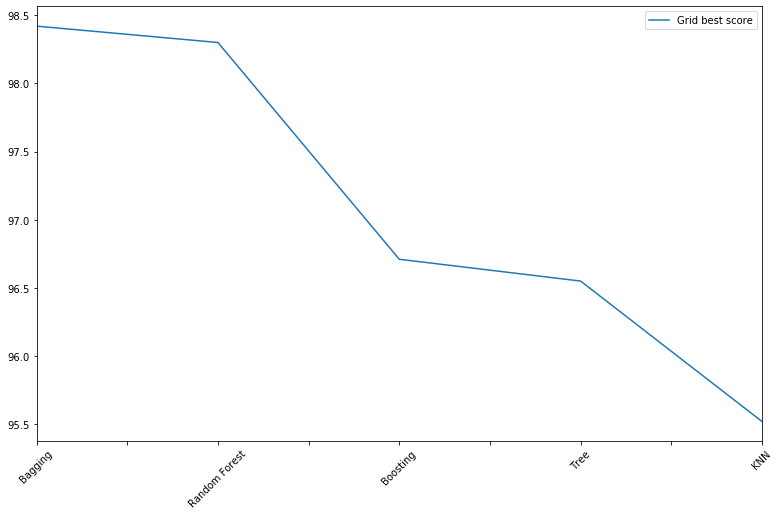

In [96]:
# First we plot which model is the best accoding to the grid search scoring.

score_opti.plot(rot=45,figsize=(13,8))

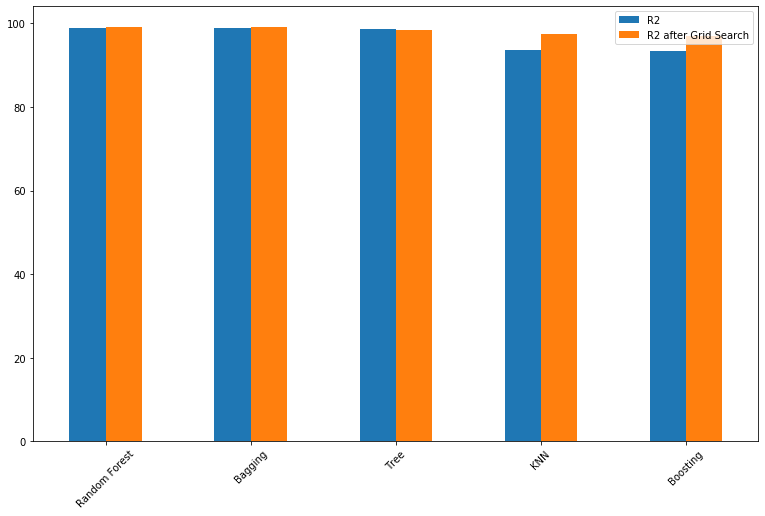

In [97]:
# Now we compare how the R2 changed for each model

compare_R2.plot(rot=45,figsize=(13,8),kind='bar')

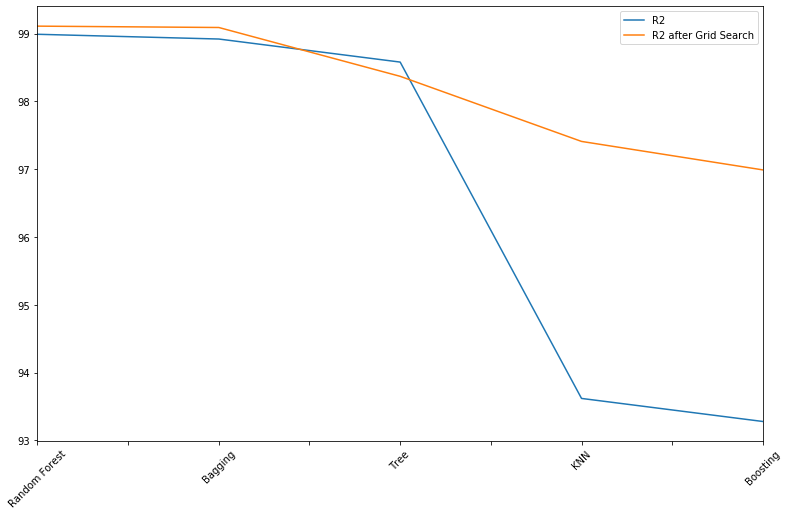

In [98]:
compare_R2.plot(rot=45,figsize=(13,8)) # same plot but easier to read

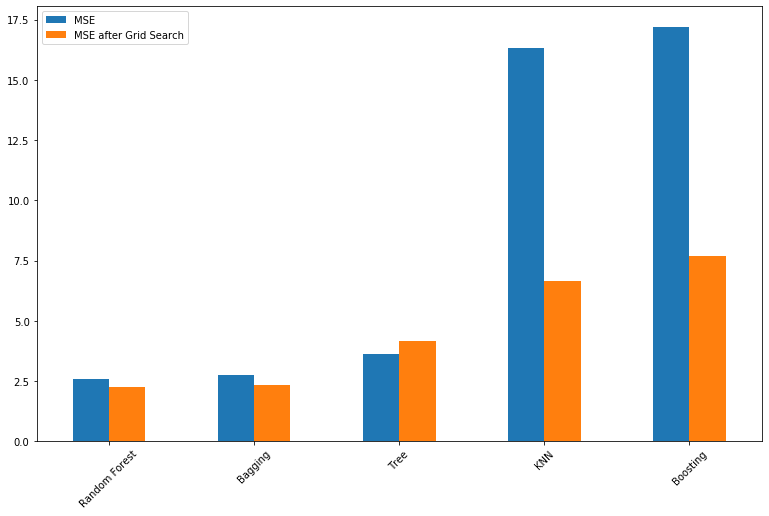

In [99]:
# Same for MSE now

compare_MSE.plot(rot=45,figsize=(13,8),kind='bar')

~> By looking at our plots, we can see that we had some drastic improvements overall : Boosting and KNN saw a really high improvement compared to their default hyperparameters. 

However, for the regression decision tree, it seems as if we started overfitting the data since its score improved (grid.best_score_) but the error got higher and the R2 got lower.

Conclusion : 

Random Forest seem to have a very slightly higher R2 and slightly lower MSE. However, Bagging has a better grid best score. So, since the results are close (and the methods are related after all, random forest is a special case of bagging), we will choose Bagging since it has a higher grid score (on unseen data thanks to oob_score = True), so it is less likely to overfit the data.


Now, usually an accuracy of > 99% would raise some red flags since the model could have overfit the data and memorized the answers. Usually we want an accuracy that is high but not very close to 100%. But we think this is completely normal and not due to overfitting just because of the context of our dataset : usually when it comes to transcoding, there's not really any magic behind it. Meaning, that for the same settings we will most likely always get the same / very close transcoding time. This differs from predicting the price of a house for example (Boston dataset), our dataset here seems logical.

To finish off, here's a corroletion plot for our dataset if we want to remove some feature that are not significant and re-train without them. But since we have a very high accuracy already, we will skip this step.

In [104]:
dataset.corr().style.background_gradient(cmap='coolwarm')


,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
duration,1,0.072634,0.0504463,0.00475852,-0.0305593,0.773659,0.850175,0.0615231,0.851053,0.4266,0.406651,nan,0.416951,0.000148989,0.000698152,0.000377109,0.000577201,0.00928152,0.00553252
width,0.072634,1,0.990467,0.815328,0.396052,0.0778287,0.238482,-0.0638234,0.235592,0.601446,0.560013,nan,0.575222,-0.00102549,-0.000244993,-8.75601e-05,-6.09139e-05,0.0351095,0.129861
height,0.0504463,0.990467,1,0.799082,0.45631,0.0933766,0.23447,-0.0690761,0.231766,0.592107,0.534646,nan,0.550593,-0.00100408,-0.000204195,-2.83569e-05,-1.21982e-05,0.0414518,0.128479
bitrate,0.00475852,0.815328,0.799082,1,0.255464,0.0592625,0.112427,-0.0459381,0.111137,0.44632,0.616313,nan,0.615846,-0.00132779,-0.000283893,-9.57003e-05,-8.83725e-05,0.0431424,0.1552
framerate,-0.0305593,0.396052,0.45631,0.255464,1,0.263127,0.332138,0.0267589,0.331983,0.306534,0.196526,nan,0.209523,-0.00168384,0.00018931,0.000102464,9.98094e-05,0.0596857,0.0793361
i,0.773659,0.0778287,0.0933766,0.0592625,0.263127,1,0.831221,0.12247,0.836373,0.537019,0.393288,nan,0.413247,-0.000739009,0.000139367,0.00121953,0.00123883,0.0342065,0.0184892
p,0.850175,0.238482,0.23447,0.112427,0.332138,0.831221,1,0.0654222,0.999844,0.665995,0.605745,nan,0.623506,-0.00178834,0.000239999,0.000393492,0.000481633,0.0312829,0.0332006
b,0.0615231,-0.0638234,-0.0690761,-0.0459381,0.0267589,0.12247,0.0654222,1,0.0813207,-0.0309689,-0.0264878,nan,-0.0264062,0.00240789,0.000262522,0.00080441,0.000834745,0.00602944,0.00513953
frames,0.851053,0.235592,0.231766,0.111137,0.331983,0.836373,0.999844,0.0813207,1,0.664543,0.603138,nan,0.620952,-0.0017398,0.000242844,0.000417432,0.000505185,0.0314509,0.0331146
i_size,0.4266,0.601446,0.592107,0.44632,0.306534,0.537019,0.665995,-0.0309689,0.664543,1,0.713713,nan,0.75178,-0.00239849,-0.000284909,0.000225884,0.000181558,0.0359314,0.0647115


# 6. Saving the trained model for our API : using Pickle

In [33]:
import pickle

final_model = BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=0.925, max_samples=1.0, n_estimators=175,
                 n_jobs=None, oob_score=True, random_state=10, verbose=0,
                 warm_start=False)

model_to_pickle = final_model.fit(X_train,y_train)

In [36]:
# Let's print the results one last time (conclusion)

pred = model_to_pickle.predict(X_test)

print(f"Using the improved Bagging model, we see that {round(model_to_pickle.score(X_test,y_test) * 100,2)} % of the data is explained (R2) and we have a MSE error of ~> {round(mean_squared_error(y_test,pred),2)}.")

cross_val = cross_val_score(model_to_pickle,X_train,y_train,cv=5)

print(f"\nUsing cross validation, we get the following scores at each fold :\n\n{cross_val}")

Using the improved Bagging model, we see that 99.09 % of the data is explained (R2) and we have a MSE error of ~> 2.33.

Using cross validation, we get the following scores at each fold :

[0.98854462 0.98607146 0.98638221 0.98657878 0.98692169]


In [37]:
# save the model for the API

pickle.dump(model_to_pickle, open('model/model.pickle', 'wb'))

In [38]:
# Let's save our scaler and one hot encoder for the API

pickle.dump(scaler,open('model/scaler.pickle','wb'))
pickle.dump(one_hot_encoder,open('model/ohe.pickle','wb'))